In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = './Resources/processed_PLACES_COPD.csv'

In [3]:
# Importing the dataset
dataset = pd.read_csv(file_path)


In [4]:
dataset.head()

,State_County,State,County,Levels_Smokers,Levels_COPD
0,"Cass, Iowa",Iowa,Cass,19.3,8.3
1,"Monona, Iowa",Iowa,Monona,18.5,8.3
2,"Dillingham, Alaska",Alaska,Dillingham,31.1,8.9
3,"Custer, Colorado",Colorado,Custer,13.8,7.5
4,"Ketchikan Gateway, Alaska",Alaska,Ketchikan Gateway,19.4,6.6


In [5]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [6]:
le = LabelEncoder()
df2 = dataset.copy()

In [7]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State_County', 'State', 'County']

In [8]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [9]:
# Display dataframe
df2

,State_County,State,County,Levels_Smokers,Levels_COPD
0,414,15,270,19.3,8.3
1,1938,15,1104,18.5,8.3
2,778,1,477,31.1,8.9
3,688,5,426,13.8,7.5
4,1484,1,869,19.4,6.6
...,...,...,...,...,...
3117,2515,49,1462,16.8,6.5
3118,290,49,209,15.1,5.5
3119,2994,48,1745,26.8,15.3
3120,3058,49,1785,17.1,5.8


In [10]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [11]:
# Create our features
#a_cols = [i for i in df2.columns if i not in ('Levels_COPD')]
#X = df2[a_cols]

# Create our target
#y = df2['Levels_COPD']

In [15]:
X = df2['County'].values
y = df2['Levels_COPD'].values


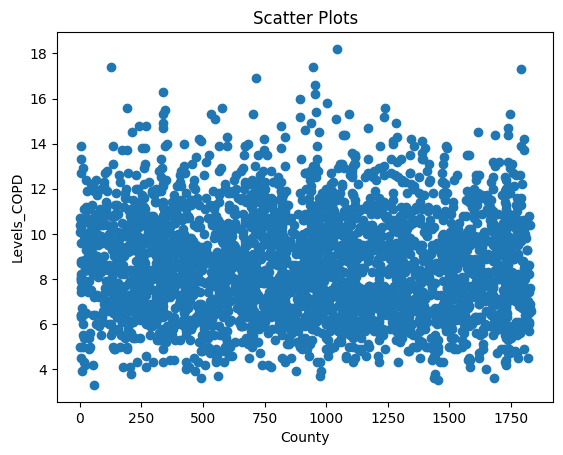

In [16]:
plt.title('Scatter Plots')
plt.xlabel('County')
plt.ylabel('Levels_COPD')
plt.scatter(x, y)
plt.show()

In [17]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)


In [18]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [20]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/var/folders/qg/6vjkgpvs7z1c7vhvhq3r44dr0000gn/T/ipykernel_30370/1803349395.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [21]:
# Step 5: Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([ 7.14      , 11.465     ,  6.194     ,  8.67771463,  9.01      ,
        9.1875    ,  7.30333333, 11.        ,  9.0926746 ,  9.94666667,
        6.61      ,  9.95563636,  9.18      ,  8.81004815, 11.12      ,
       10.589     ,  8.4940487 , 10.589     ,  7.26      ,  7.76933333,
       11.32480952,  8.58312137,  8.24      ,  9.37      , 10.01      ,
        8.33      ,  8.86291116,  6.35      ,  8.01904762,  9.87430952,
        9.87430952,  8.12703571,  6.6575    , 10.9       ,  6.71      ,
        9.46      ,  8.58312137,  9.32      ,  8.82      ,  9.2525    ,
       10.01375   ,  9.85      ,  8.275     ,  8.76683009,  6.79      ,
        8.07333333,  6.52750684,  8.97      , 12.2075    , 10.13      ,
        7.88      ,  7.24      ,  8.9       , 10.589     ,  7.19366667,
        7.94      ,  8.045     , 10.17916667,  6.57      , 10.22      ,
        7.16669048,  8.66184227,  8.41319048,  9.352     ,  6.09      ,
        9.69333333,  9.65940476,  8.69825763,  7.19333333,  9.72

In [23]:
# Step 6: Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8762481311136545
Mean Squared Error: 5.0356236685983795
Root Mean Squared Error: 2.2440195339164006


In [24]:
# Step 7: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,9.4,7.140000
1,13.5,11.465000
2,6.2,6.194000
3,6.5,8.677715
4,9.0,9.010000
...,...,...
152,9.1,9.723867
153,9.6,7.830000
154,10.6,8.790992
155,11.3,8.435847


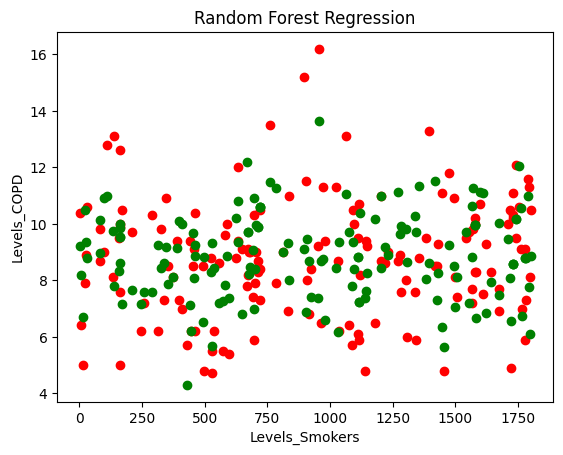

In [26]:
# # Visualising the Random Forest Regression Results  
# 
x_grid = np.arange(int(float(min(x))), int(float(max(x))), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.show()

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")